In [3]:
import pandas as pd
from os.path import join

import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [38]:
data_path = "..\\..\\..\\Dataset-1\\selfie_dataset.txt"#join("..", "..", "Dataset-1", "selfie_dataset.txt")
image_path = "..\\..\\..\\Dataset-1\\images/"#join("..", "..", "Dataset-1", "selfie_dataset.txt")#join("..", "..", "Dataset-1", "images")

In [39]:
headers = [
    "image_name", "score", "partial_faces" ,"is_female" ,"baby" ,"child" ,"teenager" ,"youth" ,"middle_age" ,"senior" ,"white" ,"black" ,"asian" ,"oval_face" ,"round_face" ,"heart_face" ,"smiling" ,"mouth_open" ,"frowning" ,"wearing_glasses" ,"wearing_sunglasses" ,"wearing_lipstick" ,"tongue_out" ,"duck_face" ,"black_hair" ,"blond_hair" ,"brown_hair" ,"red_hair" ,"curly_hair" ,"straight_hair" ,"braid_hair" ,"showing_cellphone" ,"using_earphone" ,"using_mirror", "braces" ,"wearing_hat" ,"harsh_lighting", "dim_lighting"
]
df_image_details = pd.read_csv(data_path, names=headers, delimiter=" ")
df_image_details.head(5)

,image_name,score,partial_faces,is_female,baby,child,teenager,youth,middle_age,senior,...,curly_hair,straight_hair,braid_hair,showing_cellphone,using_earphone,using_mirror,braces,wearing_hat,harsh_lighting,dim_lighting
0,00a454da495e11e28a7322000a1fa414_6,3.901,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,00cddb96ac4c11e3a30212279ba1b65f_6,4.385,1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,01cdd7aa1a1a11e2aaa822000a1fb0dd_6,4.243,-1,1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,024696bead0c11e389d50ec42b3b1b1c_6,4.169,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,026df048221a11e2b52122000a1fa4b5_6,3.873,-1,1,-1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


In [40]:
poor_threshold = 4.3
average_threshold = 4.4

In [41]:
df_poor_selfies = df_image_details[df_image_details.score <= poor_threshold]
df_average_selfies = df_image_details[(df_image_details.score > poor_threshold)]
df_average_selfies = df_image_details[(df_image_details.score <= average_threshold)]
df_great_selfies = df_image_details[df_image_details.score > average_threshold]

In [42]:
df_poor_selfies.score.values[:] = df_poor_selfies.score.astype(int)
df_poor_selfies['score'].values[:] = 0

df_average_selfies.score.values[:] = df_average_selfies.score.astype(int)
df_average_selfies['score'].values[:] = 1

df_great_selfies.score.values[:] = df_great_selfies.score.astype(int)
df_great_selfies['score'].values[:] = 2

In [43]:
print("Number of Poor Selfies:", len(df_poor_selfies))
print("Number of Average Selfies:", len(df_average_selfies))
print("Number of Great Selfies:", len(df_great_selfies))

Number of Poor Selfies: 20796
Number of Average Selfies: 24121
Number of Great Selfies: 22715


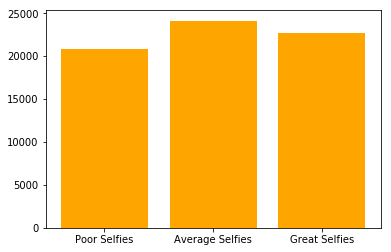

In [44]:
rating_distribution = [len(df_poor_selfies), len(df_average_selfies), len(df_great_selfies)]
plt.bar(['Poor Selfies', 'Average Selfies', 'Great Selfies'], height=rating_distribution, color="orange")
# plt.xticks(rotation=60)
plt.show()

In [45]:
df_classification = pd.DataFrame()
df_classification = df_classification.append(df_poor_selfies)
df_classification = df_classification.append(df_average_selfies)
df_classification = df_classification.append(df_great_selfies)

In [46]:
df_classification.head()
df_classification.score.unique()

array([0., 1., 2.])

In [47]:
df_classification.replace(to_replace=-1, value=0, inplace=True)
df_classification.head(3)

,image_name,score,partial_faces,is_female,baby,child,teenager,youth,middle_age,senior,...,curly_hair,straight_hair,braid_hair,showing_cellphone,using_earphone,using_mirror,braces,wearing_hat,harsh_lighting,dim_lighting
0,00a454da495e11e28a7322000a1fa414_6,0.0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,01cdd7aa1a1a11e2aaa822000a1fb0dd_6,0.0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,024696bead0c11e389d50ec42b3b1b1c_6,0.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
from keras.models import Sequential
from keras.layers import Dense, ReLU, Softmax
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD
import numpy as np

In [79]:
df_classification = df_classification.sample(frac=1)

In [80]:
X = df_classification[headers[2:]].values
Y = df_classification['score'].values

In [81]:
X.shape, Y.shape

((67632, 36), (67632,))

In [82]:
Y = to_categorical(Y)

In [83]:
test_size = 3000
X_train, Y_train = X[:-3000], Y[:-3000]
X_test, Y_test = X[-3000:], Y[-3000:]
X_train.shape, Y_train.shape,X_test.shape,  Y_test.shape

((64632, 36), (64632, 3), (3000, 36), (3000, 3))

In [92]:
model = Sequential()

model.add(Dense(36, input_shape=(36, )))
model.add(ReLU())

# model.add(Dense(256))
# model.add(ReLU())

# model.add(Dense(128))
# model.add(ReLU())

model.add(Dense(3))
model.add(Softmax())

In [93]:
model.compile(optimizer=SGD(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 36)                1332      
_________________________________________________________________
re_lu_14 (ReLU)              (None, 36)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 111       
_________________________________________________________________
softmax_9 (Softmax)          (None, 3)                 0         
Total params: 1,443
Trainable params: 1,443
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.fit(X_train, Y_train,
         validation_split=0.2,
         batch_size=2048,
         epochs=100)

Train on 51705 samples, validate on 12927 samples
Epoch 1/100
51705/51705 [==============================] - 1s 15us/step - loss: 1.1304 - acc: 0.3474 - val_loss: 1.1280 - val_acc: 0.3523
Epoch 2/100
51705/51705 [==============================] - 0s 3us/step - loss: 1.1297 - acc: 0.3470 - val_loss: 1.1273 - val_acc: 0.3503
Epoch 3/100
51705/51705 [==============================] - 0s 3us/step - loss: 1.1290 - acc: 0.3458 - val_loss: 1.1267 - val_acc: 0.3496
Epoch 4/100
51705/51705 [==============================] - 0s 3us/step - loss: 1.1284 - acc: 0.3456 - val_loss: 1.1262 - val_acc: 0.3493
Epoch 5/100
51705/51705 [==============================] - 0s 3us/step - loss: 1.1278 - acc: 0.3455 - val_loss: 1.1257 - val_acc: 0.3486
Epoch 6/100
51705/51705 [==============================] - 0s 3us/step - loss: 1.1273 - acc: 0.3449 - val_loss: 1.1252 - val_acc: 0.3479
Epoch 7/100
51705/51705 [==============================] - 0s 3us/step - loss: 1.1268 - acc: 0.3445 - val_loss: 1.1248 - val_ac